# Algorithms for Optimizations
## Chapter 3. Bracketing





### Nathan Juswanto

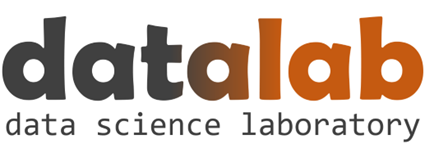

In [1]:
import numpy as np
import scipy as sp
import sympy as sy
import matplotlib.pyplot as plt

In [2]:
def plot_method(function, method, title, values=np.arange(-1.5, 1.5, 0.001), figsize=(15, 10), **method_kwargs):    
    fig, ax = plt.subplots()
    fig.set_size_inches(*figsize)

    ax.plot(values, function(values), color='k')
    if callable(method):
        for candidate in method(function, **method_kwargs):
            ax.plot(candidate, function(candidate), marker='x', markersize=15)
    else:
        ax.plot(method, function(method), marker='x', markersize=15)
        
    ax.set_ylim([-1.0, 1.0])
    ax.set_title(title)
    
    plt.show()

#### Bracketing
* identifying an interval in which a local minimum lies and then successively shrinking the interval.
* applied to a unimodal function.

#### Unimodality
A unimodal function $f$ is one where there is a unique $x_0$, such that $f$ is
monotonically decreasing for $x \le x_0$ and monotonically increasing for
$x \ge x_0$. It follows from this definition that the unique global minimum is
at $x_0$, and there are no other local minimum.

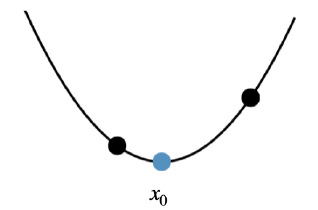

In [3]:
def f(x):
    return x * (x - 1)

In [4]:
x = sy.symbols("x")
func = x * (x - 1)
func

x*(x - 1)

In [5]:
sy.diff(func, x)

2*x - 1

In [6]:
def fprime(x):
    return (2 * x) - 1

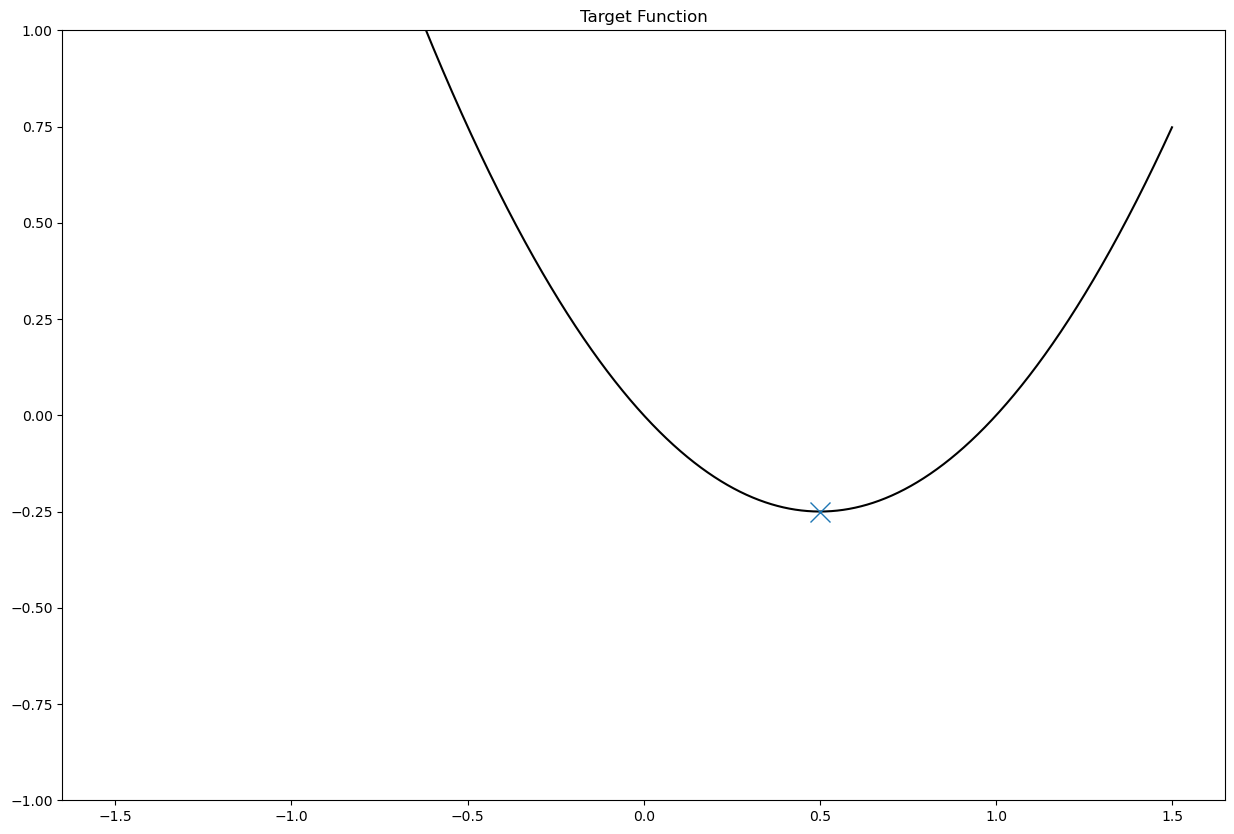

Local minimum is at x=0.500000 with value f(x)=-0.250000


In [7]:
local_minimum = .5
plot_method(f, local_minimum, "Target Function")
print(f'Local minimum is at x={local_minimum:.6f} with value f(x)={f(local_minimum):.6f}')

#### Finding an Initial Bracket
When optimizing a function, we often start by first bracketing an interval
containing a local minimum.
* Starting at a given point, a trial move in the positive direction $(1e-2)$
* Search in the downhill direction to find a new point that exceeds the lowest point.
* Expand the step size by some factor of 2.

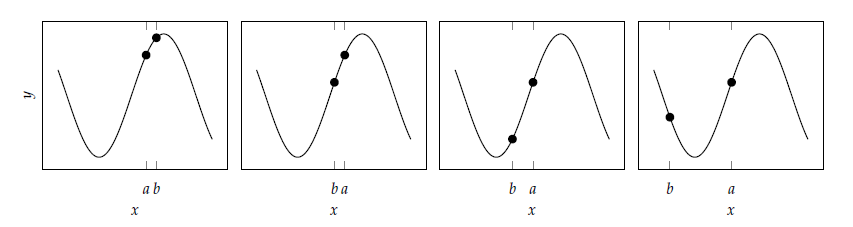

* Page 36 (Algorithm 3.1)

In [8]:
def bracket_minimum(f, x=0, s=1e-2, k=2.0):
    a, ya = x, f(x)
    b, yb = a + s, f(a + s)
    if yb > ya:
        a, b = b, a
        ya, yb = yb, ya
        s = -s
    
    while True:
        c, yc = b + s, f(b + s)
        if yc > yb:
            return (a, c) if a < c else (c, a)
        a, ya, b, yb = b, yb, c, yc
        s *= k

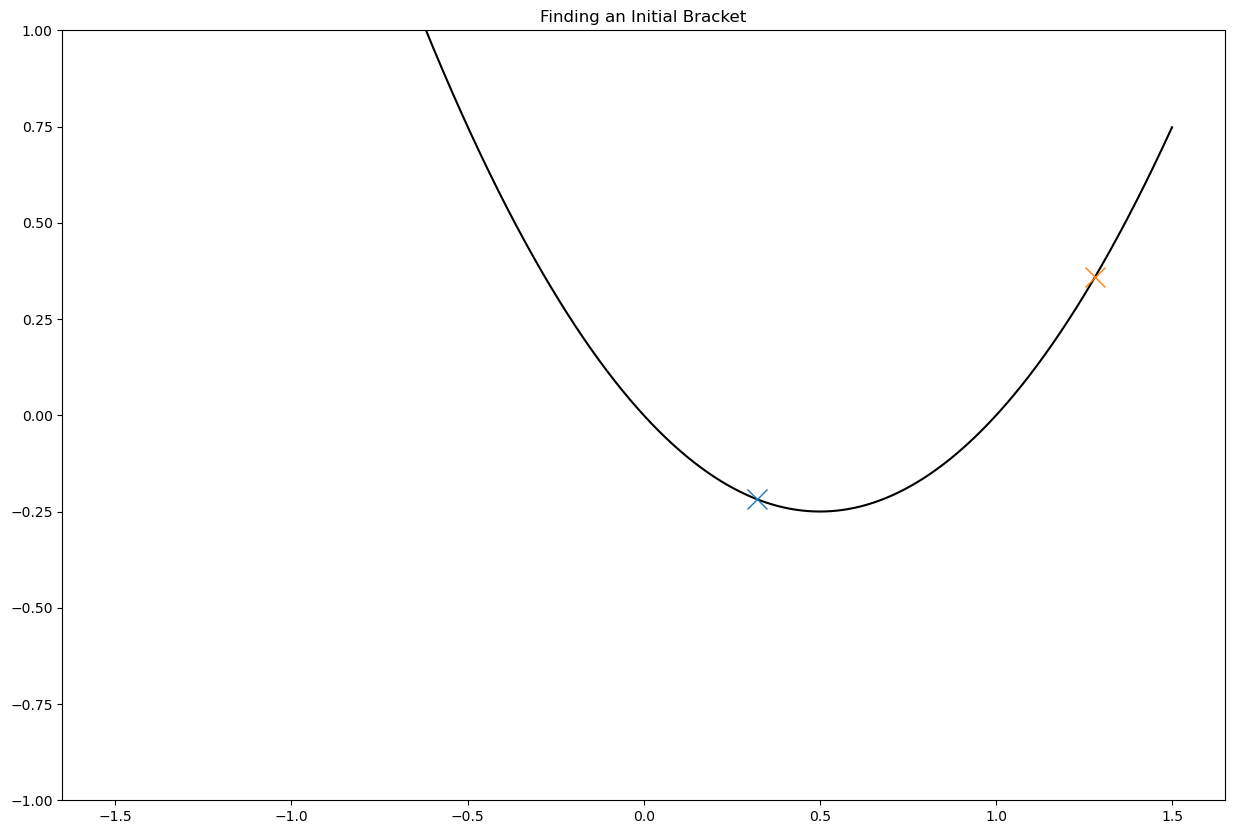

In [9]:
plot_method(f, bracket_minimum, "Finding an Initial Bracket")

In [10]:
bracket_minimum(f)

(0.32, 1.28)

#### Fibonacci Search


#### Fibonacci search

Suppose we have a unimodal $f$ bracketed by the interval $[a, b]$.
* Query $f$ on the $1/3$ and $2/3$ points on the interval.
* Query $f$ on the center of the new interval.
* Three queries ensures to shrink the interval by a factor of three.
* For n queries, the interval lengths are related to the Fibonacci sequence: 1, 1, 2, 3, 5, 8, and so forth. The first two terms are one, and the following terms are always the sum of the previous two:

$$
F_n = \left\{
    \begin{array}\\
        1 & \mbox{if } \ n \le 2 \\
        F_{n-1} + F_{n-2} & \mbox{otherwise}
    \end{array}
\right.
$$

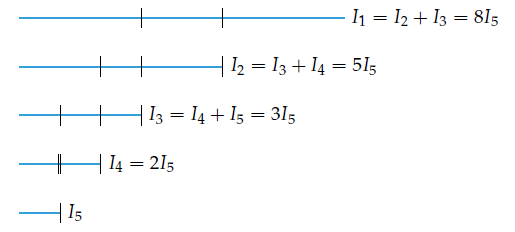

* The Fibonacci sequence can be determined analytically using Binet’s formula:
$$
F_n = \frac{\varphi^n − (1 − \varphi)^n} {\sqrt5}
$$
where $\varphi = (1 + \sqrt5) / 2 ≈ 1.61803$
* The ratio between successive values in the Fibonacci sequence is:
$$
\frac {F_n} {F_{n−1}} = \varphi \frac {1 − s^n + 1} {1 − s^n}
$$
where $s = (1 − \sqrt5) / (1 + \sqrt5) \approx −0.382$
* Page 39 (Algorithm 3.2)

In [11]:
def fibonacci_search(f, a, b, n, eps=1e-5):
    phi = (1 + np.sqrt(5)) / 2 # golden ratio
    
    s = (1 - np.sqrt(5)) / (1 + np.sqrt(5))
    rho = 1 / (phi * (1 - s**(n + 1)) / (1 - s**n))
    d = rho * b + (1 - rho) * a
    yd = f(d)
    
    for i in range(n):
        if i == n - 1:
            c = eps * a + (1 - eps) * d
        else:
            c = rho * a + (1 - rho) * b
        yc = f(c)
        if yc < yd:
            b, d, yd = d, c, yc
        else:
            a, b = b, c
        rho = 1/ (phi * (1 - s**(n - i + 1)) / (1 - s**(n - i)))
    return (a, b) if a < b else (b, a)

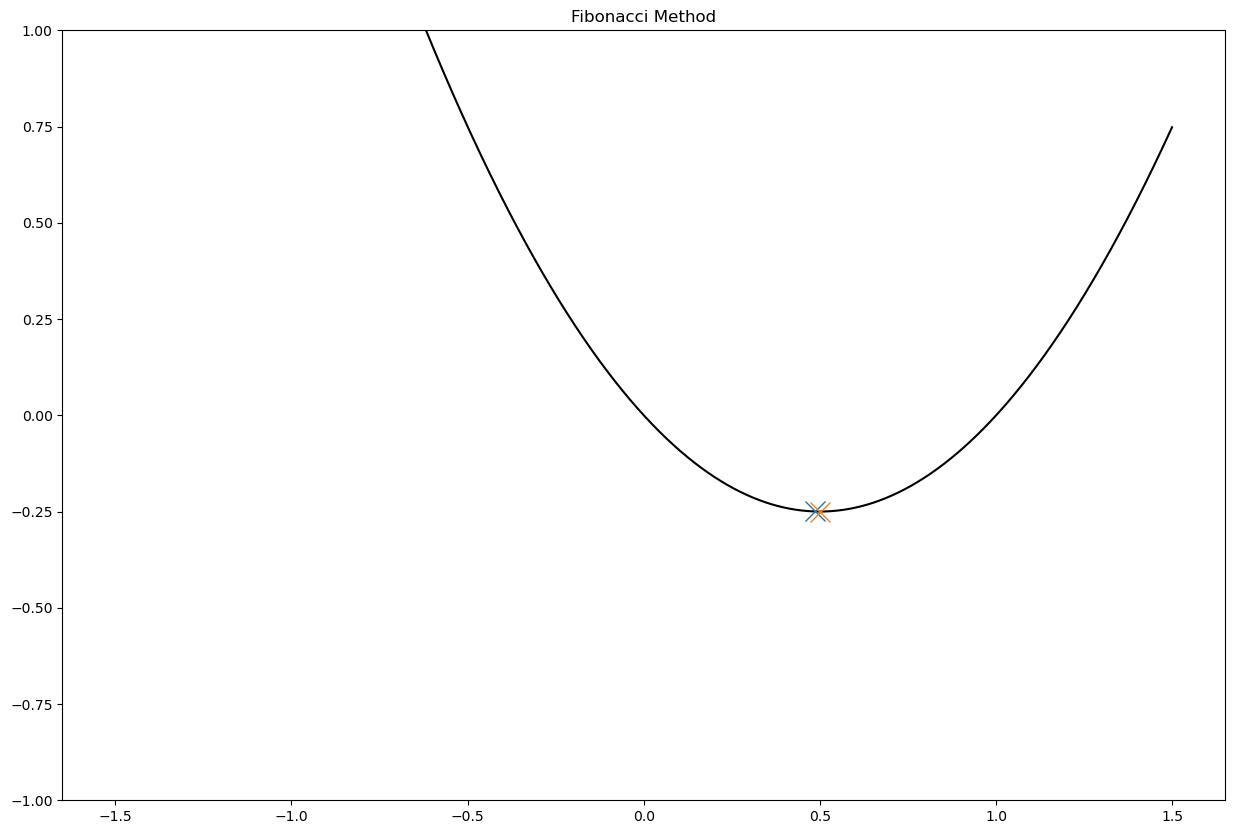

In [12]:
plot_method(f, fibonacci_search, "Fibonacci Method", a=-1., b=1., n=10)

In [13]:
fibonacci_search(f, -1., 1., 10)

(0.48600612870275783, 0.5000149200628938)

#### Golden section search

* If we take the limit for large $n$, the ratio between successive values of the Fibonacci sequence approaches the golden ratio:
$$
\lim_{n \to \infty}
\frac {F_{n-1}} {F_n}
= \varphi
=
\frac {1 + \sqrt 5} {2}
\approx 1.61803
$$
* Golden section search uses the golden ratio to approximate Fibonacci search.

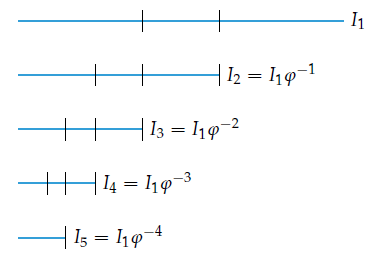

* Guaranteed to converged to within $\epsilon$ such that $n = \frac{(b - a)}{(\epsilon \log{\varphi})}$ iterations.
* Page 41 (Algorithm 3.3)



In [14]:
def golden_section_search(f, a, b, n):
    phi = (1 + np.sqrt(5)) / 2 # golden ratio
    
    rho = phi - 1
    d = rho * b + (1 - rho) * a
    yd = f(d)
    for _ in range(n):
        c = rho * a + (1 - rho) * b
        yc = f(c)
        if yc < yd:
            b, d, yd = d, c, yc
        else:
            a, b = b, c
    return (a, b) if a < b else (b, a)

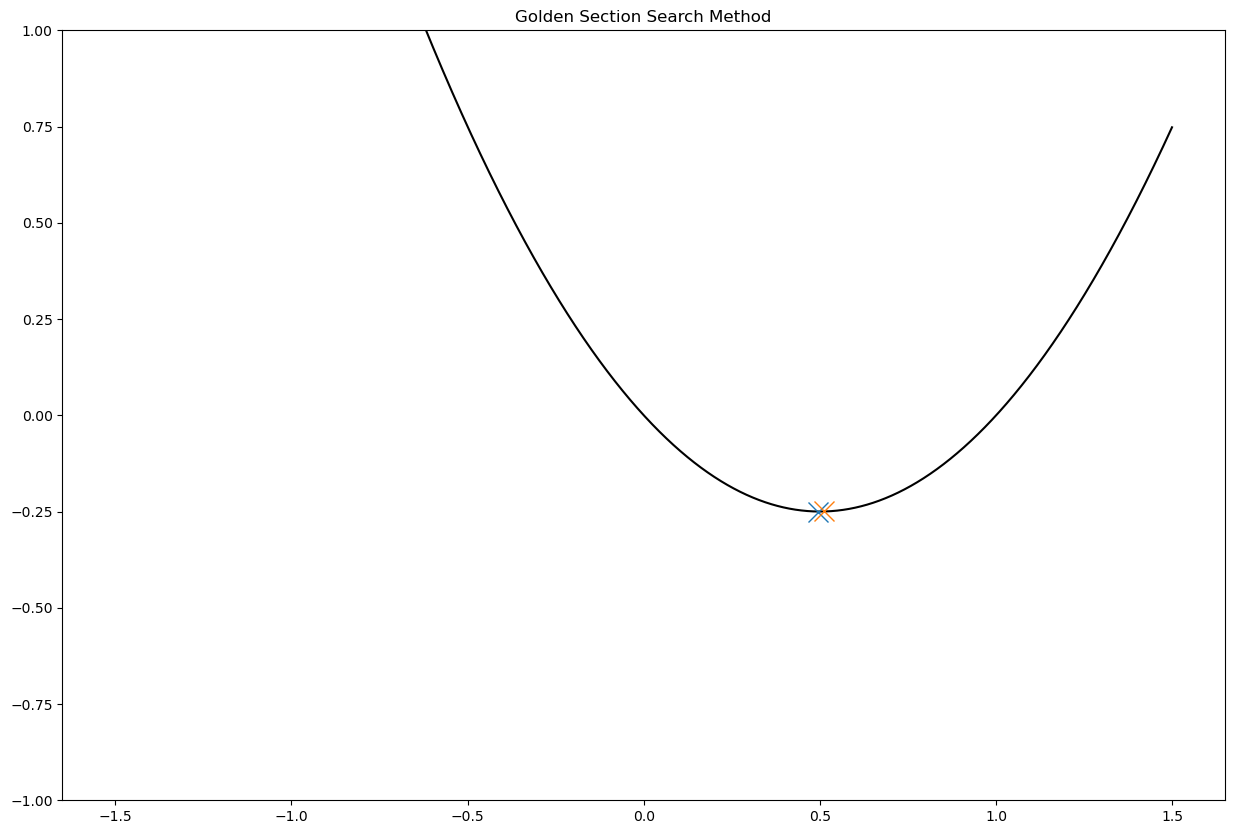

In [15]:
plot_method(f, golden_section_search, "Golden Section Search Method", a=-1., b=1., n=10)

In [16]:
golden_section_search(f, -1., 1., 10)

(0.4953415699772873, 0.5116028074888539)

#### Comparison
Both Fibonacci and golden section search searches have the property of linear scaling. Fibonacci is in principle the optimum search strategy for bracketing a unimodal function. However, golden section search is more popular due to its simplicity.

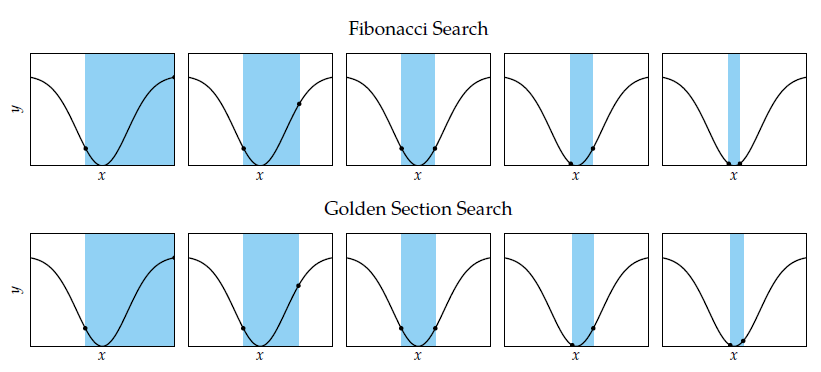

#### Quadratic fit search

Given the bracketing point $a < b < c$, we want to find the coefficient $p1$, $p2$, $p3$ which satisfies:

$$
q(x) = p_1 + p_2x + p_3x^2
$$

$$
y_a = p_1 + p_2a + p_3a^2\\
y_b = p_1 + p_2b + p_3b^2\\
y_c = p_1 + p_2c + p_3c^2
$$

In matrix form, we have

$$
\begin{bmatrix}
y_a\\
y_b\\
y_c
\end{bmatrix}
\ = \
\begin{bmatrix}
1 & a & a^2\\
1 & b & b^2\\
1 & c & c^2\\
\end{bmatrix}
.
\begin{bmatrix}
p_1\\
p_2\\
p_3
\end{bmatrix}
$$

$$
q(x) = y_a \frac {(x - b)(x - c)} {(a - b)(a - c)} \ + \ y_b \frac {(x - a)(x - c)} {(b - a)(b - c)} \ + \ y_c \frac {(x - a)(x - b)} {(c - a)(c - b)}
$$

We can solve the minimum by finding the derivative is zero:

$$
x^* = \frac 1 2 \frac {y_a(b^2 - c^2) \ + \ y_b(c^2 - a^2) \ + \ y_c(a^2 - b^2)} {y_a(b - c) \ + \ y_b(c - a) \ + \ y_c (c - b)}
$$

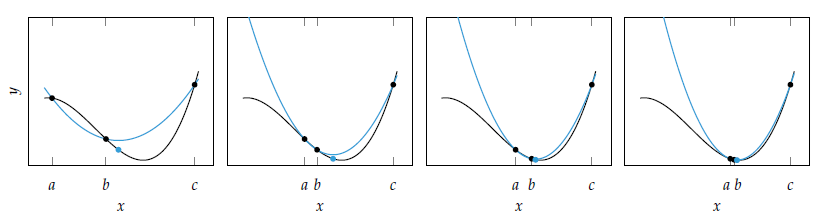

* Page 44 (Algorithm 3.4)

In [17]:
def quadratic_fit_search(f, a, b, c, n, eps=1e-5):
    ya, yb, yc = f(a), f(b), f(c)
    for _ in range(n):
        x = 0.5 * (ya * (b**2 - c**2) + yb * (c**2 - a**2) + yc * (a**2 - b**2)) / (ya * (b - c) + yb * (c - a) + yc * (a - b) + eps)
        yx = f(x)
        if x > b:
            if yx > yb:
                c, yc = x, yx
            else:
                a, ya, b, yb = b, yb, x, yx
        elif x < b:
            if yx > yb:
                a, ya = x, yx
            else:
                c, yc, b, yb = b, yb, x, yx
    return (a, b, c)

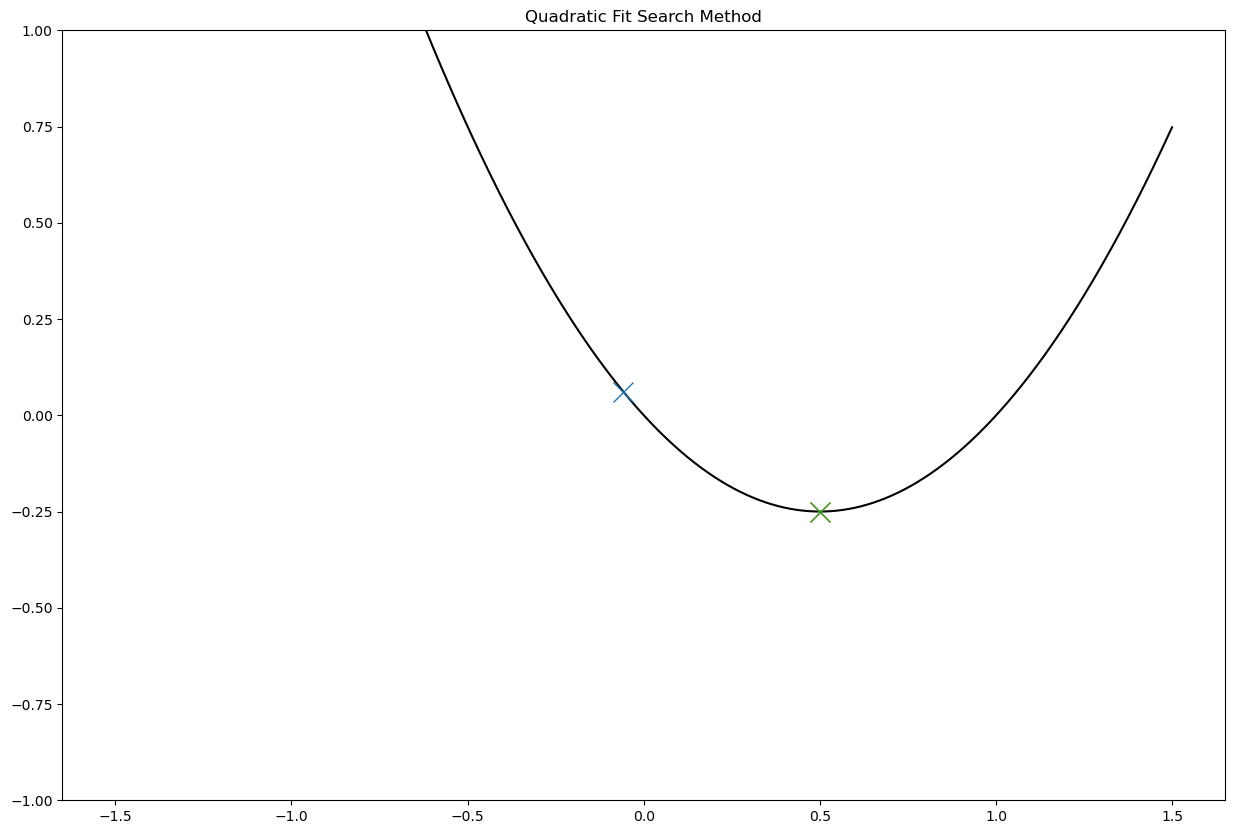

In [18]:
plot_method(f, quadratic_fit_search, "Quadratic Fit Search Method", a=-0.5, b=0., c=1.5, n=10)

In [19]:
quadratic_fit_search(f, -0.5, 0., 1.5, 10)

(-0.057876891468567525, 0.5000033333555557, 0.5000066667333339)

#### Shubert-Piyavskii method
* The Shubert-Piyavskii method requires that the function be Lipschitz continuous.
* The function $f$ is Lipschitz continuous on $[a, b]$ if there exists an $ℓ > 0$ such that:

$$
∣f(x) − f(y)∣ \ \le \ ℓ∣x − y∣ \ for \ all \ x, y \in [a, b]
$$
* For every peak, an uncertainty region can be computed according to:

$$
[x^{(i)} − \frac 1 ℓ (y_{min} − y^{(i)}), x^{(i)} + \frac 1 ℓ (y_{min} − y^{(i)}]
$$

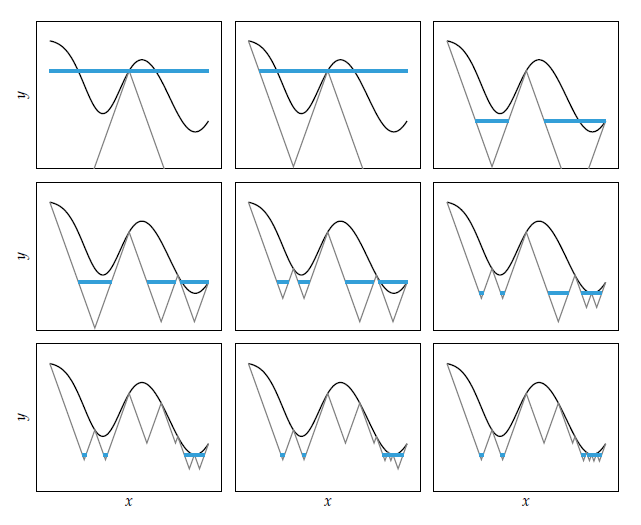

* Page 47 (Algorithm 3.5)

In [20]:
class Pt:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
def _get_sp_intersection(A: Pt, B: Pt, l: float) -> Pt:
    t = ((A.y - B.y) - l * (A.x - B.x)) / (2 * l)
    return Pt(A.x + t, A.y - t * l)

def shubert_piyavskii(f, a, b, l, eps=1e-5, delta=0.01):
    m = (a + b) / 2
    A, M, B = Pt(a, f(a)), Pt(m, f(m)), Pt(b, f(b))
    pts = [A, _get_sp_intersection(A, M, l), M, _get_sp_intersection(M, B, l), B]
    diff = np.inf
    while diff > eps:
        i = np.argmin([P.y for P in pts])
        P = Pt(pts[i].x, f(pts[i].x))
        diff = P.y - pts[i].y
        
        P_prev = _get_sp_intersection(pts[i - 1], P, l)
        P_next = _get_sp_intersection(P, pts[i + 1], l)
        
        del pts[i]
        pts.insert(i, P_next)
        pts.insert(i, P)
        pts.insert(i, P_prev)
    
    intervals = []
    i = 2 * np.argmin([P.y for P in pts[::2]]) - 1
    for j in range(1, len(pts), 2):
        if pts[j].y < pts[i].y:
            dy = pts[i].y - pts[j].y
            x_lo = max(a, pts[j].x - dy / l)
            x_hi = min(b, pts[j].x + dy / l)
            if intervals:
                if intervals[-1][1] + delta >= x_lo:
                    intervals[-1] = (intervals[-1][0], x_hi)
            else:
                intervals.append((x_lo, x_hi))
    return intervals[-1]

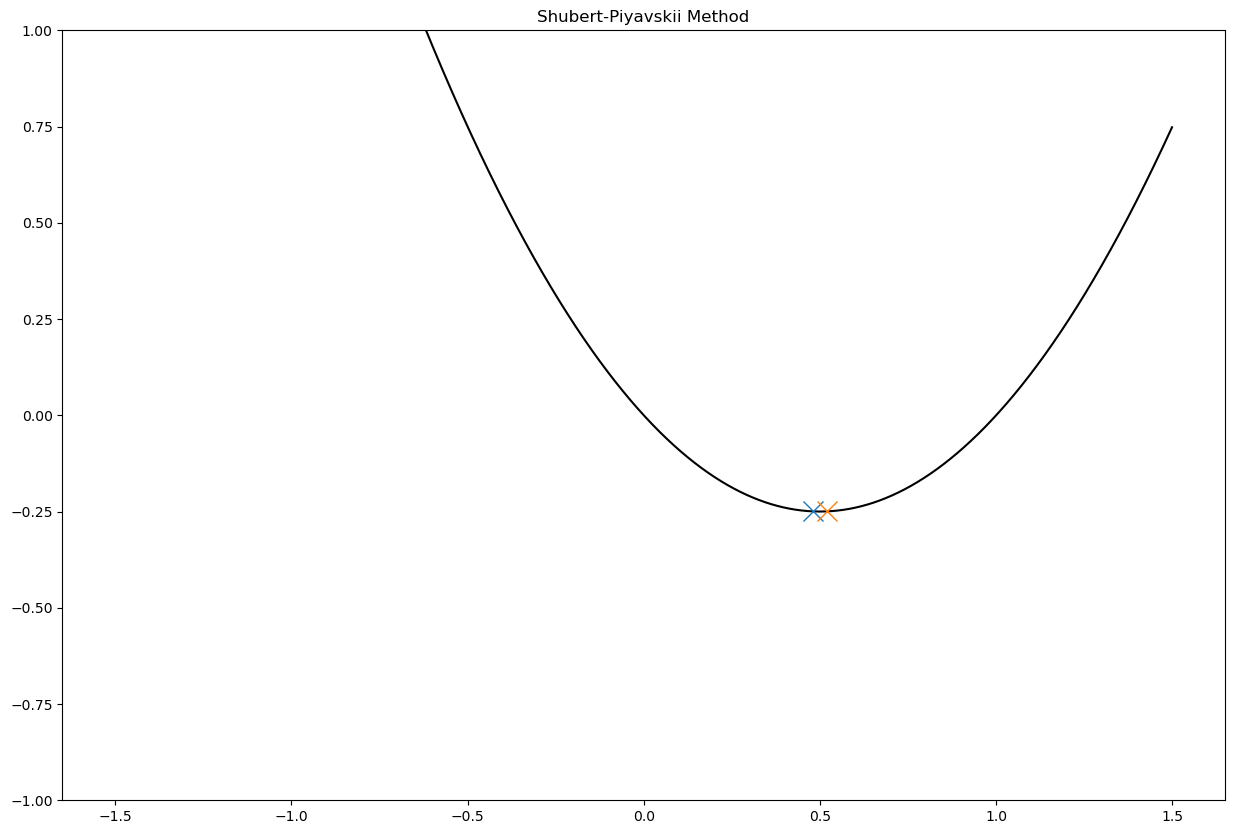

In [21]:
plot_method(f, shubert_piyavskii, "Shubert-Piyavskii Method", a=-1., b=1., l=1.5)

In [22]:
shubert_piyavskii(f, a=-1., b=1., l=1.5)

(0.4799758986209766, 0.5200241013790232)

#### Bisection method
The bisection method maintains a bracket $[a, b]$ in which at least one root is known to exist. If $f$ is continuous on $[a, b]$, and there is some $y \in [f(a), f(b)]$, then the intermediate value theorem stipulates that there exists at least one $x \in [a, b]$, such that $f (x) = y$. It follows that a bracket $[a, b]$ is guaranteed to contain a zero if $f(a)$ and $f(b)$ have opposite signs.
* Starting at $[a_1, b_1]$
* if $f'(a_n) \le 0$ and $f'(b_n) \ge 0$, let $c_n = \frac 1 2(a_n + b_n)$
* if $f'(c_n) \ge 0$, let $a_{n+1} = a_n$, $b_{n+1} = c_n$, otherwise, $a_{n+1} = c_n$, $b_{n+1} = b_n$
* terminate if $(b_{n+1} - a_{n+1}) \le \delta$ or it reaches the given number of iterations

Bisection method is commonly used to find roots of a function, or points where the function is zero.

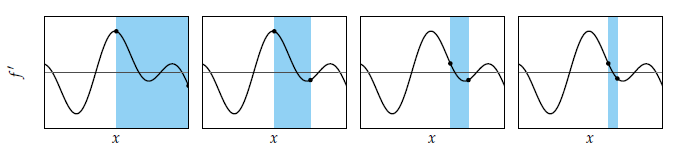

* Page 50 (Algorithm 3.6 ~ Algorithm 3.7)

In [23]:
def bisection(fprime, a, b, eps=1e-5):
    if a > b:
        a, b = b, a
    ya, yb = fprime(a), fprime(b)
    if ya == 0:
        b = a
    if yb == 0:
        a = b
    
    while b - a > eps:
        x = (a + b) / 2
        y = fprime(x)
        if y == 0:
            a, b = x, x
        elif np.sign(y) == np.sign(ya):
            a = x
        else:
            b = x
    return (a, b)

In [24]:
def bracket_sign_change(fprime, a, b, k=2):
    if a > b:
        a, b = b, a
    center, half_width = (b + a) / 2, (b - a) / 2
    while fprime(a) * fprime(b) > 0:
        half_width *= k
        a = center - half_width
        b = center - half_width
    return (a, b)

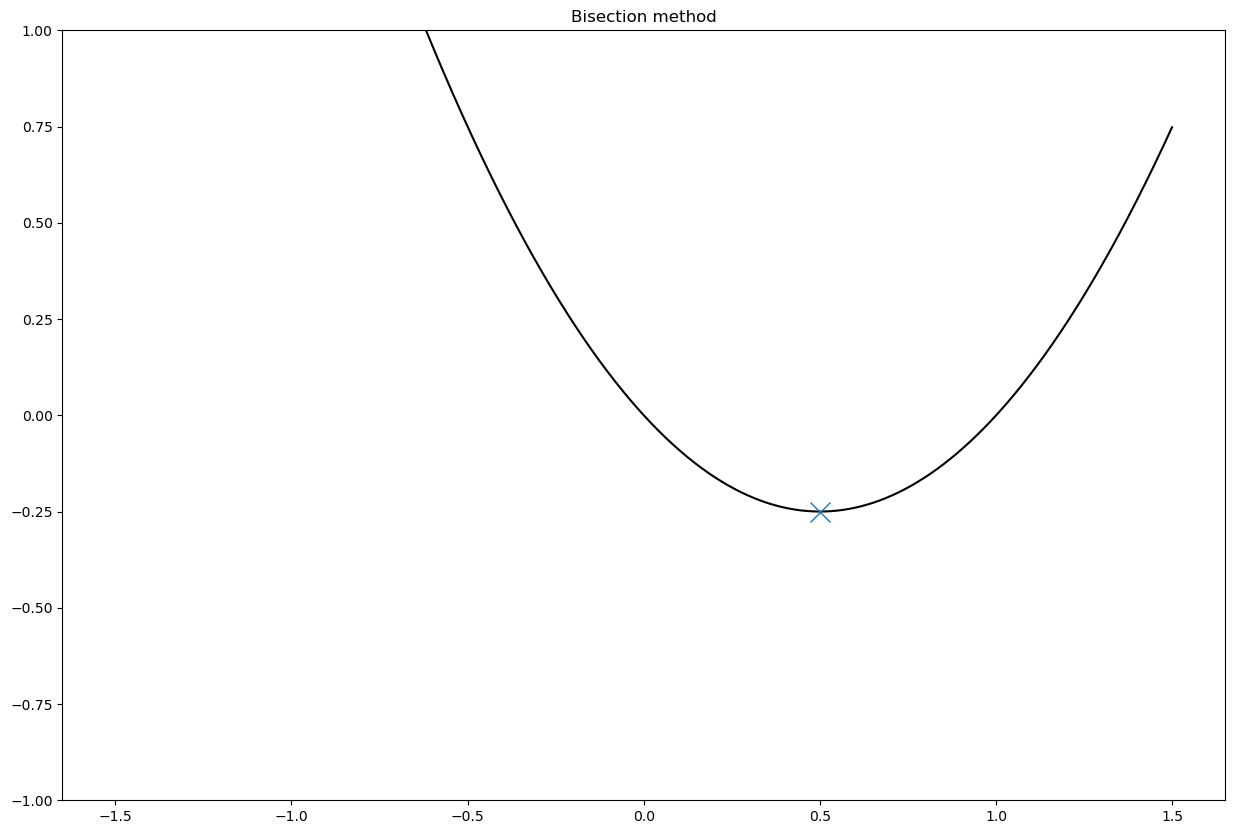

In [25]:
bisection_start, bisection_end = bisection(fprime, 0., 1.5)
plot_method(f, np.arange(bisection_start, bisection_end), "Bisection method")

In [26]:
bisection(fprime, 0., 1.5)

(0.4999980926513672, 0.5000038146972656)

#### Summary
* Many optimization methods shrink a bracketing interval, including Fibonacci search, golden section search, and quadratic fit search.
* The Shubert-Piyavskii method outputs a set of bracketed intervals containing the global minima, given the Lipschitz constant.
* Root-finding methods like the bisection.